In [41]:
import sqlite3
import os
import pandas as pd
import seaborn as sns

### merge

In [3]:
current_dir = os.getcwd()

file_name1 = "post-intervention_responses.csv"
file_name2 = "product_responses_recoded.csv"

file_path1 = os.path.join(current_dir, file_name1)
file_path2 = os.path.join(current_dir, file_name2)

In [4]:
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

In [7]:
print(df1.columns)
print(df2.columns)

Index(['Participant Private ID', 'randomiser-7gnq', '1. Age object-3 Response',
       '2. Gender object-4 Response', '3. Hispanic/Latino object-6 Response',
       '4. Identify Race object-8 Response',
       '5. Level of Education object-15 Response',
       '6. Income object-10 Response', '7. Location object-11 Response',
       '8. How often object-12 Response', 'perceived_decision_pressure',
       'perceived_authenticity_of_product', 'perceived_cue_influence',
       'decision_confidence', 'perceived_manipulativeness'],
      dtype='object')
Index(['Participant Private ID', 'Task Name', 'Product', 'Response_1',
       'Response_2', 'Response_3', 'Response_4', 'Response_2_recoded',
       'Response_3_recoded', 'Response_4_recoded'],
      dtype='object')


In [12]:
column_mapping_post = {
    "Participant Private ID": "ParticipantID",
    "randomiser-7gnq": "cue",
    "1. Age object-3 Response": "age",
    "2. Gender object-4 Response": "gender",
    "3. Hispanic/Latino object-6 Response": "hispanic",
    "4. Identify Race object-8 Response": "race",
    "5. Level of Education object-15 Response": "education",
    "6. Income object-10 Response": "income",
    "7. Location object-11 Response": "location",
    "8. How often object-12 Response": "shoppingfreq",
}

df1.rename(columns=column_mapping_post, inplace=True)

In [17]:
product_response_mapping = {
    "Response_1": "wtp",  # willingness to pay
    "Response_2": "purchase_intent_raw", 
    "Response_3": "value_raw",  
    "Response_4": "trust_raw",            

    # recoded Likert scores
    "Response_2_recoded": "purchase_intent_score",  # Likert（1–5）
    "Response_3_recoded": "value_score",            # Likert（1–5）
    "Response_4_recoded": "trust_score"             # Likert（1–7）
}

In [18]:
df2 = df2.rename(columns=product_response_mapping)
df2

,ParticipantID,Task Name,Product,wtp,purchase_intent_raw,value_raw,trust_raw,purchase_intent_score,value_score,trust_score
0,13397789,Both_cue,both_hed_choc.png,20.0,Unlikely,Somewhat valuable,Trust fairly well,2,3,5
1,13397789,Both_cue,both_hed_hd.png,95.0,Neutral,Moderately valuable,Trust fairly well,4,4,5
2,13397789,Both_cue,both_uti_choc.png,20.0,Somewhat unlikely,Somewhat valuable,Neutral,3,3,4
3,13397789,Both_cue,both_uti_hd.png,68.0,Unlikely,Moderately valuable,Trust fairly well,2,4,5
4,13397990,Scarcity_cue,scarcity_hed_choc.png,25.0,Unlikely,Somewhat valuable,Trust somewhat,2,3,3
...,...,...,...,...,...,...,...,...,...,...
123,13416442,Popularity_cue,popularity_uti_hd.png,30.0,Somewhat unlikely,Fairly valuable,Trust somewhat,3,5,3
124,13416489,Scarcity_cue,scarcity_hed_choc.png,0.0,Very unlikely,Somewhat valuable,Trust somewhat,1,3,3
125,13416489,Scarcity_cue,scarcity_hed_hd.png,0.0,Very unlikely,Somewhat valuable,Trust somewhat,1,3,3
126,13416489,Scarcity_cue,scarcity_uti_choc.png,10.0,Likely,Moderately valuable,Neutral,6,4,4


In [19]:
conn = sqlite3.connect("experiment.db")

df1.to_sql("post", conn, if_exists="replace", index=False)
df2.to_sql("product", conn, if_exists="replace", index=False)

128

In [34]:
query = """
SELECT *
FROM post
LEFT JOIN product
ON post.ParticipantID = product.ParticipantID
"""

df_merged = pd.read_sql(query, conn)

In [35]:
df_merged

,ParticipantID,cue,age,gender,hispanic,race,education,income,location,shoppingfreq,...,ParticipantID,Task Name,Product,wtp,purchase_intent_raw,value_raw,trust_raw,purchase_intent_score,value_score,trust_score
0,13397789,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,13397789.0,Both_cue,both_hed_choc.png,20.0,Unlikely,Somewhat valuable,Trust fairly well,2.0,3.0,5.0
1,13397789,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,13397789.0,Both_cue,both_hed_hd.png,95.0,Neutral,Moderately valuable,Trust fairly well,4.0,4.0,5.0
2,13397789,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,13397789.0,Both_cue,both_uti_choc.png,20.0,Somewhat unlikely,Somewhat valuable,Neutral,3.0,3.0,4.0
3,13397789,P+S,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","Less than $20,000",Yes,Once a week,...,13397789.0,Both_cue,both_uti_hd.png,68.0,Unlikely,Moderately valuable,Trust fairly well,2.0,4.0,5.0
4,13397990,Scarcity,18–24 years old,Female,No,Asian,"Master's degree (e.g., MA, MS, MBA)","$20,000–$39,999",Yes,Multiple times a week,...,13397990.0,Scarcity_cue,scarcity_hed_choc.png,25.0,Unlikely,Somewhat valuable,Trust somewhat,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,13416249,No Cue,18–24 years old,Female,No,Asian,"Bachelor's degree (e.g., BA, BS)","Less than $20,000",Yes,About once a month,...,13416249.0,None_cue,no_uti_hd.png,50.0,Somewhat unlikely,Somewhat valuable,Trust somewhat,3.0,3.0,3.0
91,13416442,Popularity,18–24 years old,Male,No,Asian,"Bachelor's degree (e.g., BA, BS)","$80,000–$99,999",Yes,2–3 times a month,...,13416442.0,Popularity_cue,popularity_hed_choc.png,7.5,Somewhat likely,Slightly valuable,Trust fairly well,5.0,2.0,5.0
92,13416442,Popularity,18–24 years old,Male,No,Asian,"Bachelor's degree (e.g., BA, BS)","$80,000–$99,999",Yes,2–3 times a month,...,13416442.0,Popularity_cue,popularity_hed_hd.png,30.0,Somewhat unlikely,Fairly valuable,Trust somewhat,3.0,5.0,3.0
93,13416442,Popularity,18–24 years old,Male,No,Asian,"Bachelor's degree (e.g., BA, BS)","$80,000–$99,999",Yes,2–3 times a month,...,13416442.0,Popularity_cue,popularity_uti_choc.png,5.0,Somewhat likely,Slightly valuable,Trust a lot,5.0,2.0,6.0


In [36]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ParticipantID                      95 non-null     int64  
 1   cue                                95 non-null     object 
 2   age                                95 non-null     object 
 3   gender                             95 non-null     object 
 4   hispanic                           95 non-null     object 
 5   race                               95 non-null     object 
 6   education                          95 non-null     object 
 7   income                             95 non-null     object 
 8   location                           95 non-null     object 
 9   shoppingfreq                       95 non-null     object 
 10  perceived_decision_pressure        95 non-null     int64  
 11  perceived_authenticity_of_product  95 non-null     int64  
 

In [37]:
def extract_product_type(product):
    if pd.isna(product):
        return "Unknown"
    
    product = product.lower()
    if "hed" in product:
        return "Hedonic"
    elif "uti" in product:
        return "Utilitarian"
    else:
        return "Unknown"

df_merged["ProductType"] = df_merged["Product"].apply(extract_product_type)

In [38]:
df_merged.to_csv('df_merged.csv', index=False)

### stats models

In [65]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def plot_coef_effect_points(dv, data):
    data = data[data["ProductType"] != "Unknown"]

    formula = f"{dv} ~ cue * ProductType"
    model = smf.ols(formula, data=data).fit()

    print(f"\n{'='*20} OLS Summary for {dv} {'='*20}")
    print(model.summary())

    summary_df = model.summary2().tables[1].reset_index()
    summary_df.columns = ['term', 'coef', 'std_err', 't', 'p', '[0.025', '0.975]']

    cues = ['P+S', 'Popularity', 'Scarcity']
    product_types = ['Utilitarian']

    def extract_types(term):
        cue = next((c for c in cues if f"cue[T.{c}]" in term), "No Cue")
        prod = next((p for p in product_types if f"ProductType[T.{p}]" in term), "Hedonic")
        return pd.Series([cue, prod])

    filtered = summary_df[summary_df['term'].str.contains("cue|ProductType")]
    filtered = filtered[~filtered['term'].str.contains("Intercept")]
    filtered[['Cue', 'ProductType']] = filtered['term'].apply(extract_types)

    # baseline：No Cue × Hedonic
    baseline = pd.DataFrame({
        'term': ['Intercept'],
        'coef': [0],
        'std_err': [0],
        'p': [1],
        'Cue': ['No Cue'],
        'ProductType': ['Hedonic']
    })

    coef_df = pd.concat([baseline, filtered[['term', 'coef', 'std_err', 'p', 'Cue', 'ProductType']]], ignore_index=True)
    coef_df['label'] = coef_df['coef'].round(2).astype(str) + coef_df['p'].apply(lambda p: '*' if p < 0.05 else '')
    coef_df['err'] = coef_df['std_err']

    cue_order = ['Scarcity', 'Popularity', 'P+S', 'No Cue']
    coef_df['Cue'] = pd.Categorical(coef_df['Cue'], categories=cue_order, ordered=True)
    coef_df = coef_df.sort_values(by='Cue', ascending=False)

    fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    for i, prod_type in enumerate(['Hedonic', 'Utilitarian']):
        sub = coef_df[coef_df["ProductType"] == prod_type]
        y_pos = np.arange(len(sub))

        axes[i].errorbar(sub['coef'], y_pos, xerr=sub['err'], fmt='o', color='black', capsize=5)

        axes[i].axvline(0, color='red', linestyle='--')
        axes[i].set_yticks(y_pos)
        axes[i].set_yticklabels(sub['Cue'])
        axes[i].set_title(prod_type)
        axes[i].set_xlabel("Coefficient")

    axes[0].set_ylabel("Cue Type")
    fig.suptitle(f"Cue × ProductType Effect on {dv}\nR² = {model.rsquared:.2f}, Adj R² = {model.rsquared_adj:.2f}, N = {len(data)}", fontsize=14)
    plt.tight_layout()
    plt.show()

#### wtp ~ cue * ProductType


==================== OLS Summary for wtp ====================
                            OLS Regression Results                            
Dep. Variable:                    wtp   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     1.307
Date:                Fri, 16 May 2025   Prob (F-statistic):              0.257
Time:                        17:16:19   Log-Likelihood:                -460.45
No. Observations:                  92   AIC:                             936.9
Df Residuals:                      84   BIC:                             957.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

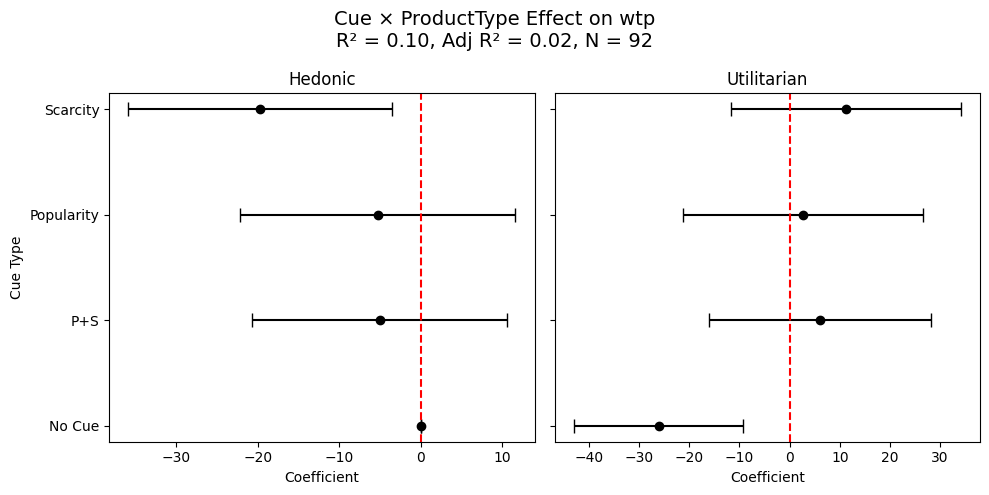

In [66]:
plot_coef_effect_points("wtp", df_merged)

#### trust_score ~ cue * ProductType


==================== OLS Summary for trust_score ====================
                            OLS Regression Results                            
Dep. Variable:            trust_score   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     1.845
Date:                Fri, 16 May 2025   Prob (F-statistic):             0.0891
Time:                        17:17:34   Log-Likelihood:                -149.20
No. Observations:                  92   AIC:                             314.4
Df Residuals:                      84   BIC:                             334.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

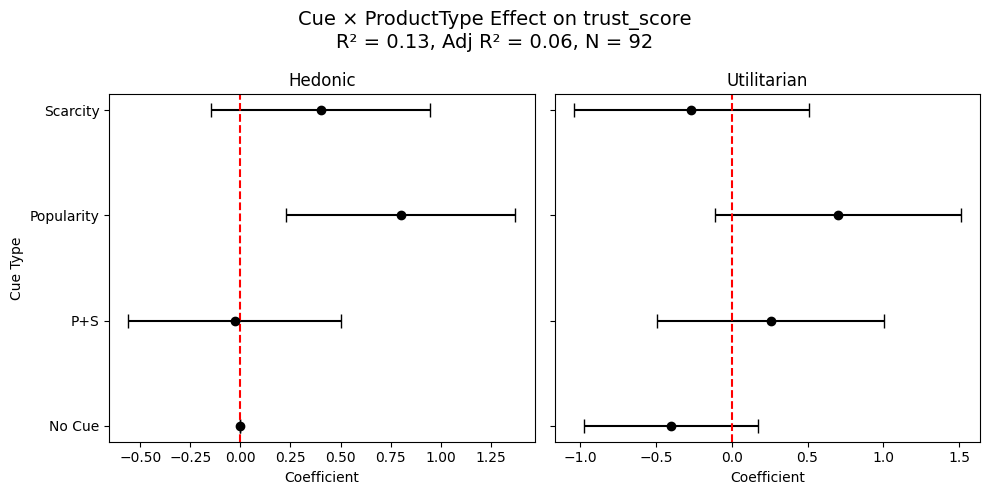

In [68]:
plot_coef_effect_points("trust_score", df_merged)

#### value_score ~ cue * ProductType


==================== OLS Summary for value_score ====================
                            OLS Regression Results                            
Dep. Variable:            value_score   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     3.039
Date:                Fri, 16 May 2025   Prob (F-statistic):            0.00672
Time:                        17:18:17   Log-Likelihood:                -153.48
No. Observations:                  92   AIC:                             323.0
Df Residuals:                      84   BIC:                             343.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

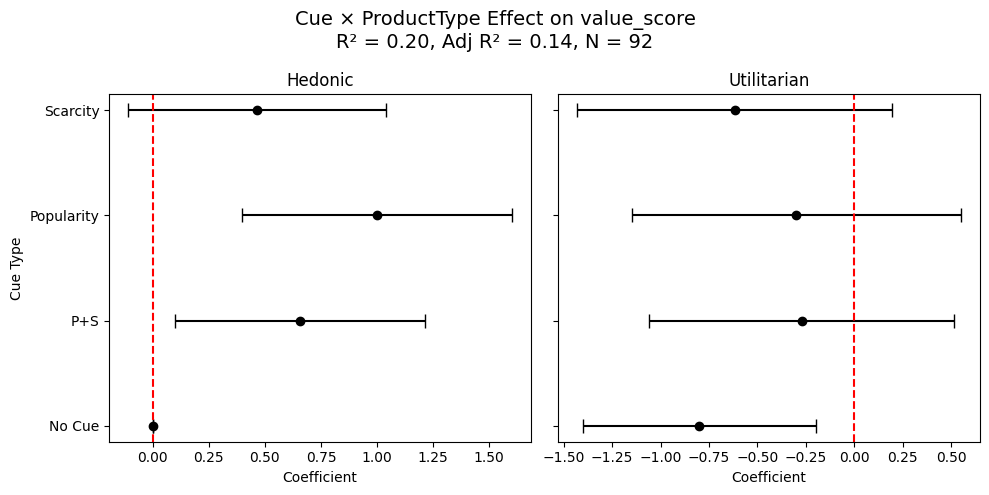

In [69]:
plot_coef_effect_points("value_score", df_merged)

#### purchase_intent_score	~ cue * ProductType


==================== OLS Summary for purchase_intent_score ====================
                              OLS Regression Results                             
Dep. Variable:     purchase_intent_score   R-squared:                       0.061
Model:                               OLS   Adj. R-squared:                 -0.017
Method:                    Least Squares   F-statistic:                    0.7783
Date:                   Fri, 16 May 2025   Prob (F-statistic):              0.607
Time:                           17:18:44   Log-Likelihood:                -160.98
No. Observations:                     92   AIC:                             338.0
Df Residuals:                         84   BIC:                             358.1
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.02

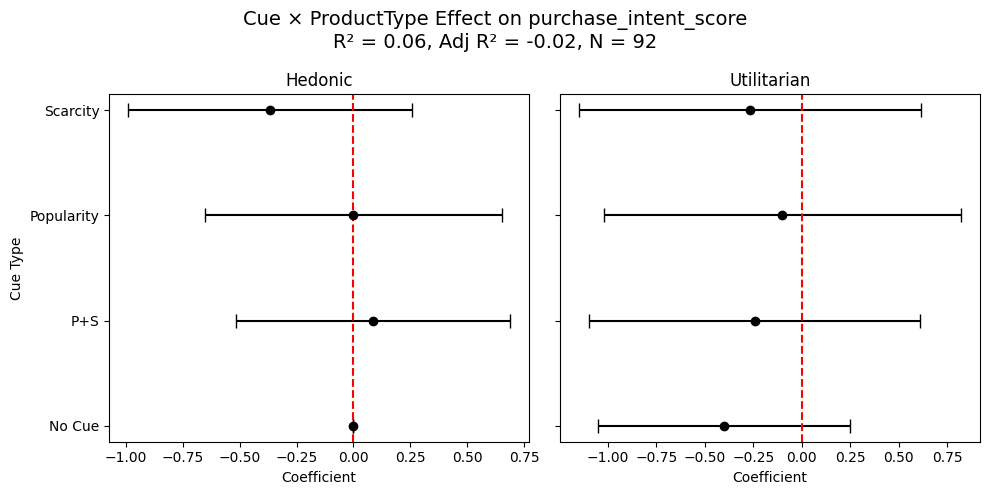

In [70]:
plot_coef_effect_points("purchase_intent_score", df_merged)